In [20]:
from YahooDownloader import YahooDownloader
from envs.StockTradingEnv import StockTradingEnv
from FeatureEngineer import FeatureEngineer
from sklearn.model_selection import train_test_split
from agents.stablebaselines3.models import DRLAgent
from pathlib import Path
import config
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.use("Agg")
%matplotlib inline

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
# Create Dirs

for dir in config.DIRS:
    Path(dir).mkdir(parents=True, exist_ok=True)

In [6]:
tickers = ["TCS.NS","BAJFINANCE.NS"]
# tickers = ["BAJFINANCE.NS"]
df = YahooDownloader(tickers=tickers).download_data().post_process()
df

[*********************100%***********************]  2 of 2 completed
Shape of DataFrame: (2474, 8)


,date,tic,close,high,low,open,volume,day
0,2017-07-18,BAJFINANCE.NS,1495.785400,1528.226194,1490.494022,1521.104983,501708,1
1,2017-07-18,TCS.NS,1096.644165,1112.422026,1091.088796,1091.088796,1908002,1
2,2017-07-19,BAJFINANCE.NS,1524.962158,1560.122829,1498.406269,1503.005362,2655273,2
3,2017-07-19,TCS.NS,1115.427490,1120.163095,1099.717886,1099.899982,3915576,2
4,2017-07-20,BAJFINANCE.NS,1577.876343,1590.387813,1530.154818,1534.012126,2169635,3
...,...,...,...,...,...,...,...,...
2469,2022-07-14,TCS.NS,2998.750000,3057.000000,2967.000000,3056.000000,4764908,3
2470,2022-07-15,BAJFINANCE.NS,5915.200195,5928.250000,5812.850098,5855.000000,569859,4
2471,2022-07-15,TCS.NS,2994.600098,3028.899902,2953.000000,3018.550049,4574806,4
2472,2022-07-18,BAJFINANCE.NS,6059.799805,6068.100098,5931.350098,5969.899902,966155,0


In [7]:
fe_df = FeatureEngineer(df).post_process()
fe_df

,date,tic,close,high,low,open,volume,day,sma_30,sma_60,ema_8,ema_21,macd,rsi_30,rsi_70,dx_30,cci_30,boll_ub,boll_lb
0,2017-09-07,BAJFINANCE.NS,1941.697266,1964.148708,1850.655550,1859.408593,4271734,3,1449.144971,1433.447021,1536.559197,1481.452241,37.085981,51.375125,50.566001,5.543868,100.247713,2211.754829,776.299954
0,2017-09-07,TCS.NS,1123.364990,1127.154962,1119.232432,1122.406015,870636,3,1448.654073,1432.599198,1444.738262,1448.898855,3.532069,49.046142,49.522296,1.210606,-68.992014,2236.894709,733.709664
1,2017-09-08,BAJFINANCE.NS,1870.485718,1953.318408,1860.397486,1948.422673,2856329,4,1454.009757,1435.962779,1539.348808,1487.224933,36.802514,51.138170,50.469197,5.732939,92.077751,2265.687403,766.901567
1,2017-09-08,TCS.NS,1128.160034,1129.712545,1119.917768,1120.465706,1021134,4,1453.780684,1435.312834,1447.973525,1454.582670,3.232837,49.067498,49.532609,1.427871,-68.270763,2265.357211,729.929032
2,2017-09-11,BAJFINANCE.NS,1899.415405,1914.251111,1877.260847,1879.189441,1098804,0,1460.885335,1439.287154,1548.293943,1495.022009,38.419611,51.191657,50.500827,5.638889,89.108563,2288.148142,760.681178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,2022-07-14,TCS.NS,2998.750000,3057.000000,2967.000000,3056.000000,4764908,3,4460.650635,4446.844592,4281.323820,4401.866931,-61.297325,48.994083,49.548551,0.286303,-78.125898,7169.210360,1642.890699
1200,2022-07-15,BAJFINANCE.NS,5915.200195,5928.250000,5812.850098,5855.000000,569859,4,4472.241374,4445.325753,4644.407459,4539.442682,68.028367,50.953533,50.333868,3.523310,75.146501,7288.785011,1682.726976
1200,2022-07-15,TCS.NS,2994.600098,3028.899902,2953.000000,3018.550049,4574806,4,4462.580363,4438.050871,4277.783601,4399.002447,-64.405682,49.003329,49.550287,0.376095,-77.670007,7201.576530,1586.125380
1201,2022-07-18,BAJFINANCE.NS,6059.799805,6068.100098,5931.350098,5969.899902,966155,0,4477.215877,4439.061597,4673.787202,4549.984025,77.086772,51.037913,50.372868,3.615149,80.656999,7382.808127,1616.887502


In [8]:
fe_df.index = fe_df["date"].factorize()[0]

# make sure test_size is always even
train, trade = train_test_split(fe_df, shuffle=False, test_size=0.26)

print(f"Number of training samples: {len(train)}")
print(f"Number of testing samples: {len(trade)}")

Number of training samples: 1778
Number of testing samples: 626


## how state_space is calculated -
1 = [HMAX]</br>
2 * STOCK_DIMENSION = ["DATE", "CLOSE"] * len(TICKERS)</br>
(len(tech_indicator_list) * NumOfTickers) = len(['sma_30', 'sma_60', 'ema_8', 'ema_21', 'macd', 'rsi_30', 'rsi_70','dx_30', 'cci_30', 'boll_ub', 'boll_lb']) * len(TICKERS)</br>

In [11]:
e_train_gym = StockTradingEnv(train, mode="train", model_name="a2c")
e_trade_gym = StockTradingEnv(trade, mode="trade", model_name="a2c")
env_train, _ = e_train_gym.get_sb_env()
agent = DRLAgent(env=env_train)
model_a2c = agent.get_model("a2c")
trained_a2c = agent.train_model(model=model_a2c, tb_log_name="a2c", total_timesteps=500_000)

Logging to results
Logging to results
Using cuda device
---------------------------------------
| time/                 |             |
|    fps                | 107         |
|    iterations         | 100         |
|    time_elapsed       | 4           |
|    total_timesteps    | 500         |
| train/                |             |
|    entropy_loss       | -2.84       |
|    explained_variance | 0.801       |
|    learning_rate      | 0.0007      |
|    n_updates          | 99          |
|    policy_loss        | -0.617      |
|    reward             | -0.36754996 |
|    std                | 0.999       |
|    value_loss         | 0.0443      |
---------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 142         |
|    iterations         | 200         |
|    time_elapsed       | 7           |
|    total_timesteps    | 1000        |
| train/                |             |
|    entropy_loss       

In [21]:
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_a2c, environment=e_trade_gym
)
df_account_value_a2c

hit end!


,date,account_value
0,2021-04-16,100000.000000
1,2021-04-19,97005.813561
2,2021-04-20,99789.207848
3,2021-04-22,101331.771081
4,2021-04-23,100886.054772
...,...,...
308,2022-07-12,126748.882653
309,2022-07-13,126815.405846
310,2022-07-14,125774.359948
311,2022-07-15,127541.562096


In [28]:
df_actions_a2c

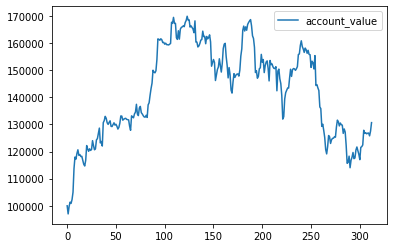

In [23]:
df_account_value_a2c.plot()
plt.show()

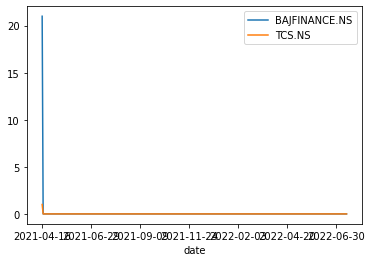

In [24]:
df_actions_a2c.plot()
plt.show()

In [29]:
from plot import backtest_stats
 
backtest_stats(df_account_value_a2c)

Annual return          0.240147
Cumulative returns     0.306471
Annual volatility      0.321163
Sharpe ratio           0.832694
Calmar ratio           0.730631
Stability              0.015074
Max drawdown          -0.328685
Omega ratio            1.161010
Sortino ratio          1.221260
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.076047
Daily value at risk   -0.039401
dtype: float64


c:\Users\Dhruv\AppData\Local\Programs\Python\Python38\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Annual return          0.240147
Cumulative returns     0.306471
Annual volatility      0.321163
Sharpe ratio           0.832694
Calmar ratio           0.730631
Stability              0.015074
Max drawdown          -0.328685
Omega ratio            1.161010
Sortino ratio          1.221260
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.076047
Daily value at risk   -0.039401
dtype: float64